Fetching data from 

In [1]:
dataset = 'data-es'
base_url = f"https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/{dataset}/records"
import requests

params = {
    'limit': 20,
    'refine': [
        'carac159:"Clubs sportifs, comités, ligues, fédérations"',
        'dep_nom:"Paris"'
        ],
}

res = requests.get(
    url=base_url,
    params=params
)
print('url : ', res.url)
print('res.headers : ', res.headers)
print('content : ', res.json())
import pandas as pd
d = dict(res.json())
data = pd.DataFrame(d['results'])

url :  https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/records?limit=20&refine=carac159%3A%22Clubs+sportifs%2C+comit%C3%A9s%2C+ligues%2C+f%C3%A9d%C3%A9rations%22&refine=dep_nom%3A%22Paris%22
res.headers :  {'Server': 'openresty', 'Date': 'Tue, 30 Jan 2024 10:03:19 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-RateLimit-Remaining': '4611', 'X-RateLimit-Limit': '5000', 'X-RateLimit-Reset': '2024-01-31 00:00:00+00:00', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Vary': 'Accept-Language, Cookie, Host', 'Content-Language': 'fr-fr', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'POST, GET, OPTIONS', 'Access-Control-Max-Age': '1000', 'Access-Control-Allow-Headers': 'Authorization, X-Requested-With, Origin, ODS-API-Analytics-App, ODS-API-Analytics-Embed-Type, ODS-API-Analytics-Embed-Referrer, ODS-Widgets-Version, Accept', 'Access-Control-Expose-He

C:\Users\PA\AppData\Local\Temp\ipykernel_13172\2732337791.py:20: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
from tqdm import tqdm
import pandas as pd
import requests

# import data multiple times
d = pd.DataFrame([])
list_data = []
for i in tqdm(range(20)):
    params = {
        'limit': 100,
        'refine': [
            'carac159:"Clubs sportifs, comités, ligues, fédérations"',
            'dep_nom:"Paris"'
            ],
        'offset': i*100,
    }

    res = requests.get(
        url=base_url,
        params=params
    )

    temp = pd.DataFrame((res.json())['results'])
    list_data.append(temp)

  0%|          | 0/20 [00:00<?, ?it/s]


NameError: name 'base_url' is not defined

In [4]:
res.json()['total_count']

193670

In [5]:
data = pd.concat(list_data).reset_index(drop=True)

C:\Users\PA\AppData\Local\Temp\ipykernel_9676\3597297232.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(list_data).reset_index(drop=True)


In [5]:
data.columns

Index(['numinstallation', 'nominstallation', 'adresse', 'codepostal',
       'new_name', 'new_code', 'actif', 'etat', 'date_creation', 'date_etat',
       ...
       'epci_nom', 'dep_code', 'dep_nom', 'reg_code', 'reg_nom',
       'dep_code_filled', 'aca_nom', 'lib_bdv', 'code_bdv', 'coordonnees'],
      dtype='object', length=103)

In [6]:
data.carac159.value_counts()

carac159
[Clubs sportifs, comités, ligues, fédérations]                                                                                                 465
[Individuel(s), famille(s), Clubs sportifs, comités, ligues, fédérations]                                                                      372
[Individuel(s), famille(s), Clubs sportifs, comités, ligues, fédérations, Scolaires, universités, Autre - association(s) et groupes divers]    294
[Clubs sportifs, comités, ligues, fédérations, Scolaires, universités]                                                                         268
[Clubs sportifs, comités, ligues, fédérations, Autre - association(s) et groupes divers]                                                       178
[Clubs sportifs, comités, ligues, fédérations, Scolaires, universités, Autre - association(s) et groupes divers]                               145
[Individuel(s), famille(s), Clubs sportifs, comités, ligues, fédérations, Autre - association(s) et groupes d

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 103 entries, numinstallation to coordonnees
dtypes: float64(16), object(87)
memory usage: 1.6+ MB


In [8]:
coords = pd.json_normalize(data.coordonnees)

In [9]:
coords

,lon,lat
0,4.920600,46.153100
1,5.344280,45.961550
2,5.348870,45.961530
3,5.337220,45.955270
4,5.343390,45.958840
...,...,...
1995,7.494453,43.786600
1996,6.971389,43.622222
1997,6.950700,43.625990
1998,6.970000,43.616111


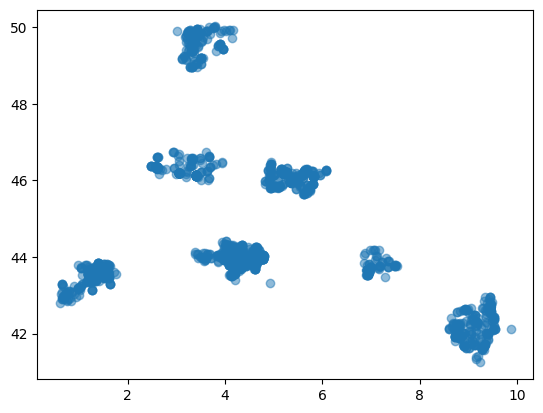

In [10]:
import matplotlib.pyplot as plt

plt.scatter(coords.lon, coords.lat, alpha=0.5)

In [11]:
import geopandas as gpd
import contextily as cx

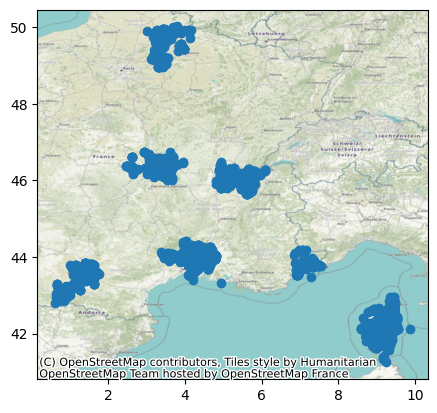

In [12]:
ax = gpd.GeoDataFrame(
    data=coords,
    geometry=gpd.points_from_xy(coords.lon, coords.lat, crs="EPSG:4326"),
    crs="EPSG:4326"
).plot()
cx.add_basemap(ax, crs="EPSG:4326")

In [11]:
from api import make_api_call

refine =  [
    'carac159:"Clubs sportifs, comités, ligues, fédérations"',
    'dep_nom:"Paris"'
    ]
d = make_api_call(20, refine, 0)

In [12]:
import json

with open("../data/first_request.json", 'w') as f:
    json.dump(d, f)

In [13]:
for i in tqdm(range(20)):
    d = make_api_call(20, refine, i*20)

100%|██████████| 20/20 [00:06<00:00,  3.22it/s]


In [14]:
list_data = []

for i in tqdm(range(20)):
    temp = pd.DataFrame(make_api_call(20, refine, i*20)['results'])
    list_data.append(temp)

100%|██████████| 20/20 [00:06<00:00,  3.28it/s]


In [15]:
for i in tqdm(range(100)):
    pd.DataFrame(make_api_call(100, refine, i*20)['results']).to_csv(f"../data/raw/request_{i}.csv")

 89%|████████▉ | 89/100 [00:34<00:04,  2.57it/s]


ReadTimeout: HTTPSConnectionPool(host='equipements.sports.gouv.fr', port=443): Read timed out. (read timeout=2)

In [ ]:
from api import get_total_count

get_total_count(refine=refine) // 100 + 1

res :  {'total_count': 1489, 'results': [{'numinstallation': 'I751190012', 'nominstallation': 'SALLES DE SPORT CHAUMONT LEPAGE', 'adresse': '15 RUE CHAUMONT', 'codepostal': '75019', 'new_name': 'Paris 19e Arrondissement', 'new_code': '75119', 'actif': 'True', 'etat': 'Validé', 'date_creation': '2005-09-22', 'date_etat': '2018-04-03', 'date_valid': '2018-04-03', 'carac3': 'true', 'carac4': '28/03/2018', 'carac15': 'true', 'carac16': 'false', 'carac19': None, 'carac20': '{"Handicap moteur"}', 'carac21': '{Métro,Bus}', 'siret': None, 'uai': None, 'numequipement': 'E002I751190012', 'nomequipement': 'SALLE DE DANSE', 'codetypequipement': '2105', 'typequipement': 'Salle de danse', 'famille': 'Salle ou terrain spécialisé', 'tagequipement': 'validé', 'coordgpsx': 2.37137, 'coordgpsy': 48.8806, 'carac24': 'true', 'carac25': 'false', 'carac27': 'false', 'carac29': 'true', 'carac31': 'true', 'carac33': 'false', 'carac34': 'true', 'carac35': 'true', 'carac38': 'false', 'carac50': None, 'carac51': 

15

In [8]:
from tqdm import tqdm

max = get_total_count(refine=refine) // 100 + 1
for i in tqdm(range(max)):
    pd.DataFrame(make_api_call(100, refine, i*20)['results']).to_csv(f"../data/raw/request_{i}.csv")
    break

res :  {'total_count': 1489, 'results': [{'numinstallation': 'I751190012', 'nominstallation': 'SALLES DE SPORT CHAUMONT LEPAGE', 'adresse': '15 RUE CHAUMONT', 'codepostal': '75019', 'new_name': 'Paris 19e Arrondissement', 'new_code': '75119', 'actif': 'True', 'etat': 'Validé', 'date_creation': '2005-09-22', 'date_etat': '2018-04-03', 'date_valid': '2018-04-03', 'carac3': 'true', 'carac4': '28/03/2018', 'carac15': 'true', 'carac16': 'false', 'carac19': None, 'carac20': '{"Handicap moteur"}', 'carac21': '{Métro,Bus}', 'siret': None, 'uai': None, 'numequipement': 'E002I751190012', 'nomequipement': 'SALLE DE DANSE', 'codetypequipement': '2105', 'typequipement': 'Salle de danse', 'famille': 'Salle ou terrain spécialisé', 'tagequipement': 'validé', 'coordgpsx': 2.37137, 'coordgpsy': 48.8806, 'carac24': 'true', 'carac25': 'false', 'carac27': 'false', 'carac29': 'true', 'carac31': 'true', 'carac33': 'false', 'carac34': 'true', 'carac35': 'true', 'carac38': 'false', 'carac50': None, 'carac51': 

  0%|          | 0/15 [00:00<?, ?it/s]


In [7]:
from odsclient import get_whole_dataset

dataset_id = "osm-france-sport-facility"
csv_str = get_whole_dataset(dataset_id, platform_id='public')

print(csv_str)

KeyboardInterrupt: 

query opendatasoft

check es connesries de corenting


In [17]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [18]:
session_data = pd.read_csv("../data/raw/session_planning_olympics.csv")

In [19]:
session_data.head()

,Unnamed: 0,num_jour,date,num_session,debut_epreuve,fin_epreuve,lieu_epreuve,nom_epreuve
0,0,6,Jeudi 1 Août,ATH01,07:30,11:05,Trocadéro,NaN
1,1,6,Jeudi 1 Août,ATH02,10:00,13:00,Stade de France,"Décathlon - 100 m, hommes Lancer de marteau - ..."
2,2,6,Jeudi 1 Août,ATH02,17:40,22:00,Stade de France,"Décathlon - saut en hauteur, hommes 5 000 m - ..."
3,3,6,Jeudi 1 Août,ATH04,10:00,16:00,Stade de France,"Décathlon - 110 m haies, hommes Saut à la perc..."
4,4,6,Jeudi 1 Août,ATH04,19:00,22:00,Stade de France,"1 500 m - hommes, Repêchages Lancer de poids -..."


In [23]:
lieu_epreuves = session_data.lieu_epreuve.unique()

In [24]:
print('lieu epreuves : ', lieu_epreuves)

lieu epreuves :  ['Trocadéro' 'Stade de France'
 "Hôtel de Ville (site de départ) - Invalides (site d'arrivée)"
 'Stade nautique de Vaires-sur-Marne - Bassin eaux calmes'
 'Arena Porte de La Chapelle' 'Stade Pierre Mauroy*' 'La Concorde 1'
 'La Concorde Park - femmes, qualification Park - hommes, qualification JOUR 5 Mercredi 31 Juillet Session BMF02 Début :'
 'Stade BMX de Saint-Quentin-en-Yvelines'
 'Stade nautique de Vaires-sur-Marne - Bassin eaux vives'
 'Vélodrome National de Saint-Quentin-en-Yvelines'
 'Vélodrome National de Saint-Quentin-en-Yvelines Vitesse - hommes, 16e finale Poursuite par équipes - hommes, finales Vitesse - hommes, 16e finale - repêchages Poursuite par équipes - femmes, finales Vitesse - hommes, 8e finale Vitesse - hommes, 8e finale - repêchages JOUR 13 Jeudi 8 Août Session CTR05 Début : 17:00 Fin : 20:25 Vélodrome National de Saint-Quentin-en-Yvelines'
 'Vélodrome National de Saint-Quentin-en-Yvelines Madison - femmes, finale Vitesse - femmes, 16e finale Vit

In [38]:
for lieu in lieu_epreuves:
    dataset = "data-es"
    base_url = f"https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/{dataset}/records"
    limit = 2
    params = {
        "limit": limit,
        "where": f'nominstallation:"{lieu}" AND reg_nom:"Île-de-France"',

    }

    res = requests.get(url=base_url, params=params, timeout=2)
    print("resultat : ", res.json())

resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 'results': []}
resultat :  {'total_count': 0, 're

In [41]:
for lieu in lieu_epreuves:
    dataset = "data-es"
    base_url = f"https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/{dataset}/records"
    limit = 2
    params = {
        "limit": limit,
        "where": f'nominstallation:"{lieu}"',
    }

    res = requests.get(url=base_url, params=params, timeout=2)
    if res.json()['total_count'] != 0:
        print(res.json())
    

    if res.json()['total_count'] == 0:
        params = {
            "limit": limit,
            "where": f'nominstallation:"{lieu.upper()}"',
        }
        res = requests.get(url=base_url, params=params, timeout=2)
        if res.json()['total_count'] != 0:
            print('trouve avec json', res.json())


trouve avec json {'total_count': 2, 'results': [{'numinstallation': 'I930660048', 'nominstallation': 'STADE DE FRANCE', 'adresse': 'Avenue du Stade de France', 'codepostal': '93200', 'new_name': 'Saint-Denis', 'new_code': '93066', 'actif': 'True', 'etat': 'Validé', 'date_creation': '2005-09-22', 'date_etat': '2013-01-09', 'date_valid': '2013-01-09', 'carac3': 'true', 'carac4': '30/07/2012', 'carac15': 'false', 'carac16': 'false', 'carac19': None, 'carac20': '{"Handicap moteur","Handicap sensoriel"}', 'carac21': '{Métro,Bus,Train}', 'siret': None, 'uai': None, 'numequipement': 'E001I930660048', 'nomequipement': 'TERRAIN  DE  FOOTBALL', 'codetypequipement': '2801', 'typequipement': 'Terrain mixte', 'famille': 'Terrain de grands jeux', 'tagequipement': 'validé', 'coordgpsx': 2.3601, 'coordgpsy': 48.92445, 'carac24': 'true', 'carac25': 'false', 'carac27': 'false', 'carac29': 'true', 'carac31': 'true', 'carac33': 'false', 'carac34': 'true', 'carac35': 'true', 'carac38': 'false', 'carac50': 